In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import json
from scipy.stats import pointbiserialr, spearmanr
from scipy.stats import chi2_contingency

In [2]:
with open("columns_description.txt", "r") as file:
    lines = file.readlines()

columns_dict = {}
for line in lines:
    if ": " in line:  # Ensure the line contains a key-value separator
        key, value = line.strip().split(": ", 1)
        columns_dict[key] = value

with open("columns_dict.json", "w") as json_file:
    json.dump(columns_dict, json_file, indent=4)

In [3]:
with open("columns_dict.json", "r") as json_file:
    columns_dict = json.load(json_file)

In [4]:
df = pd.read_csv('train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df = df.set_index('Id')

In [6]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if col not in numeric_cols]

In [7]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

We could see that this dataset have 33 numerical , 31 categorical, and 15 ordinal features. 

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_nulls = df.isna().sum()[df.isna().sum() > 0]
df_nulls

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

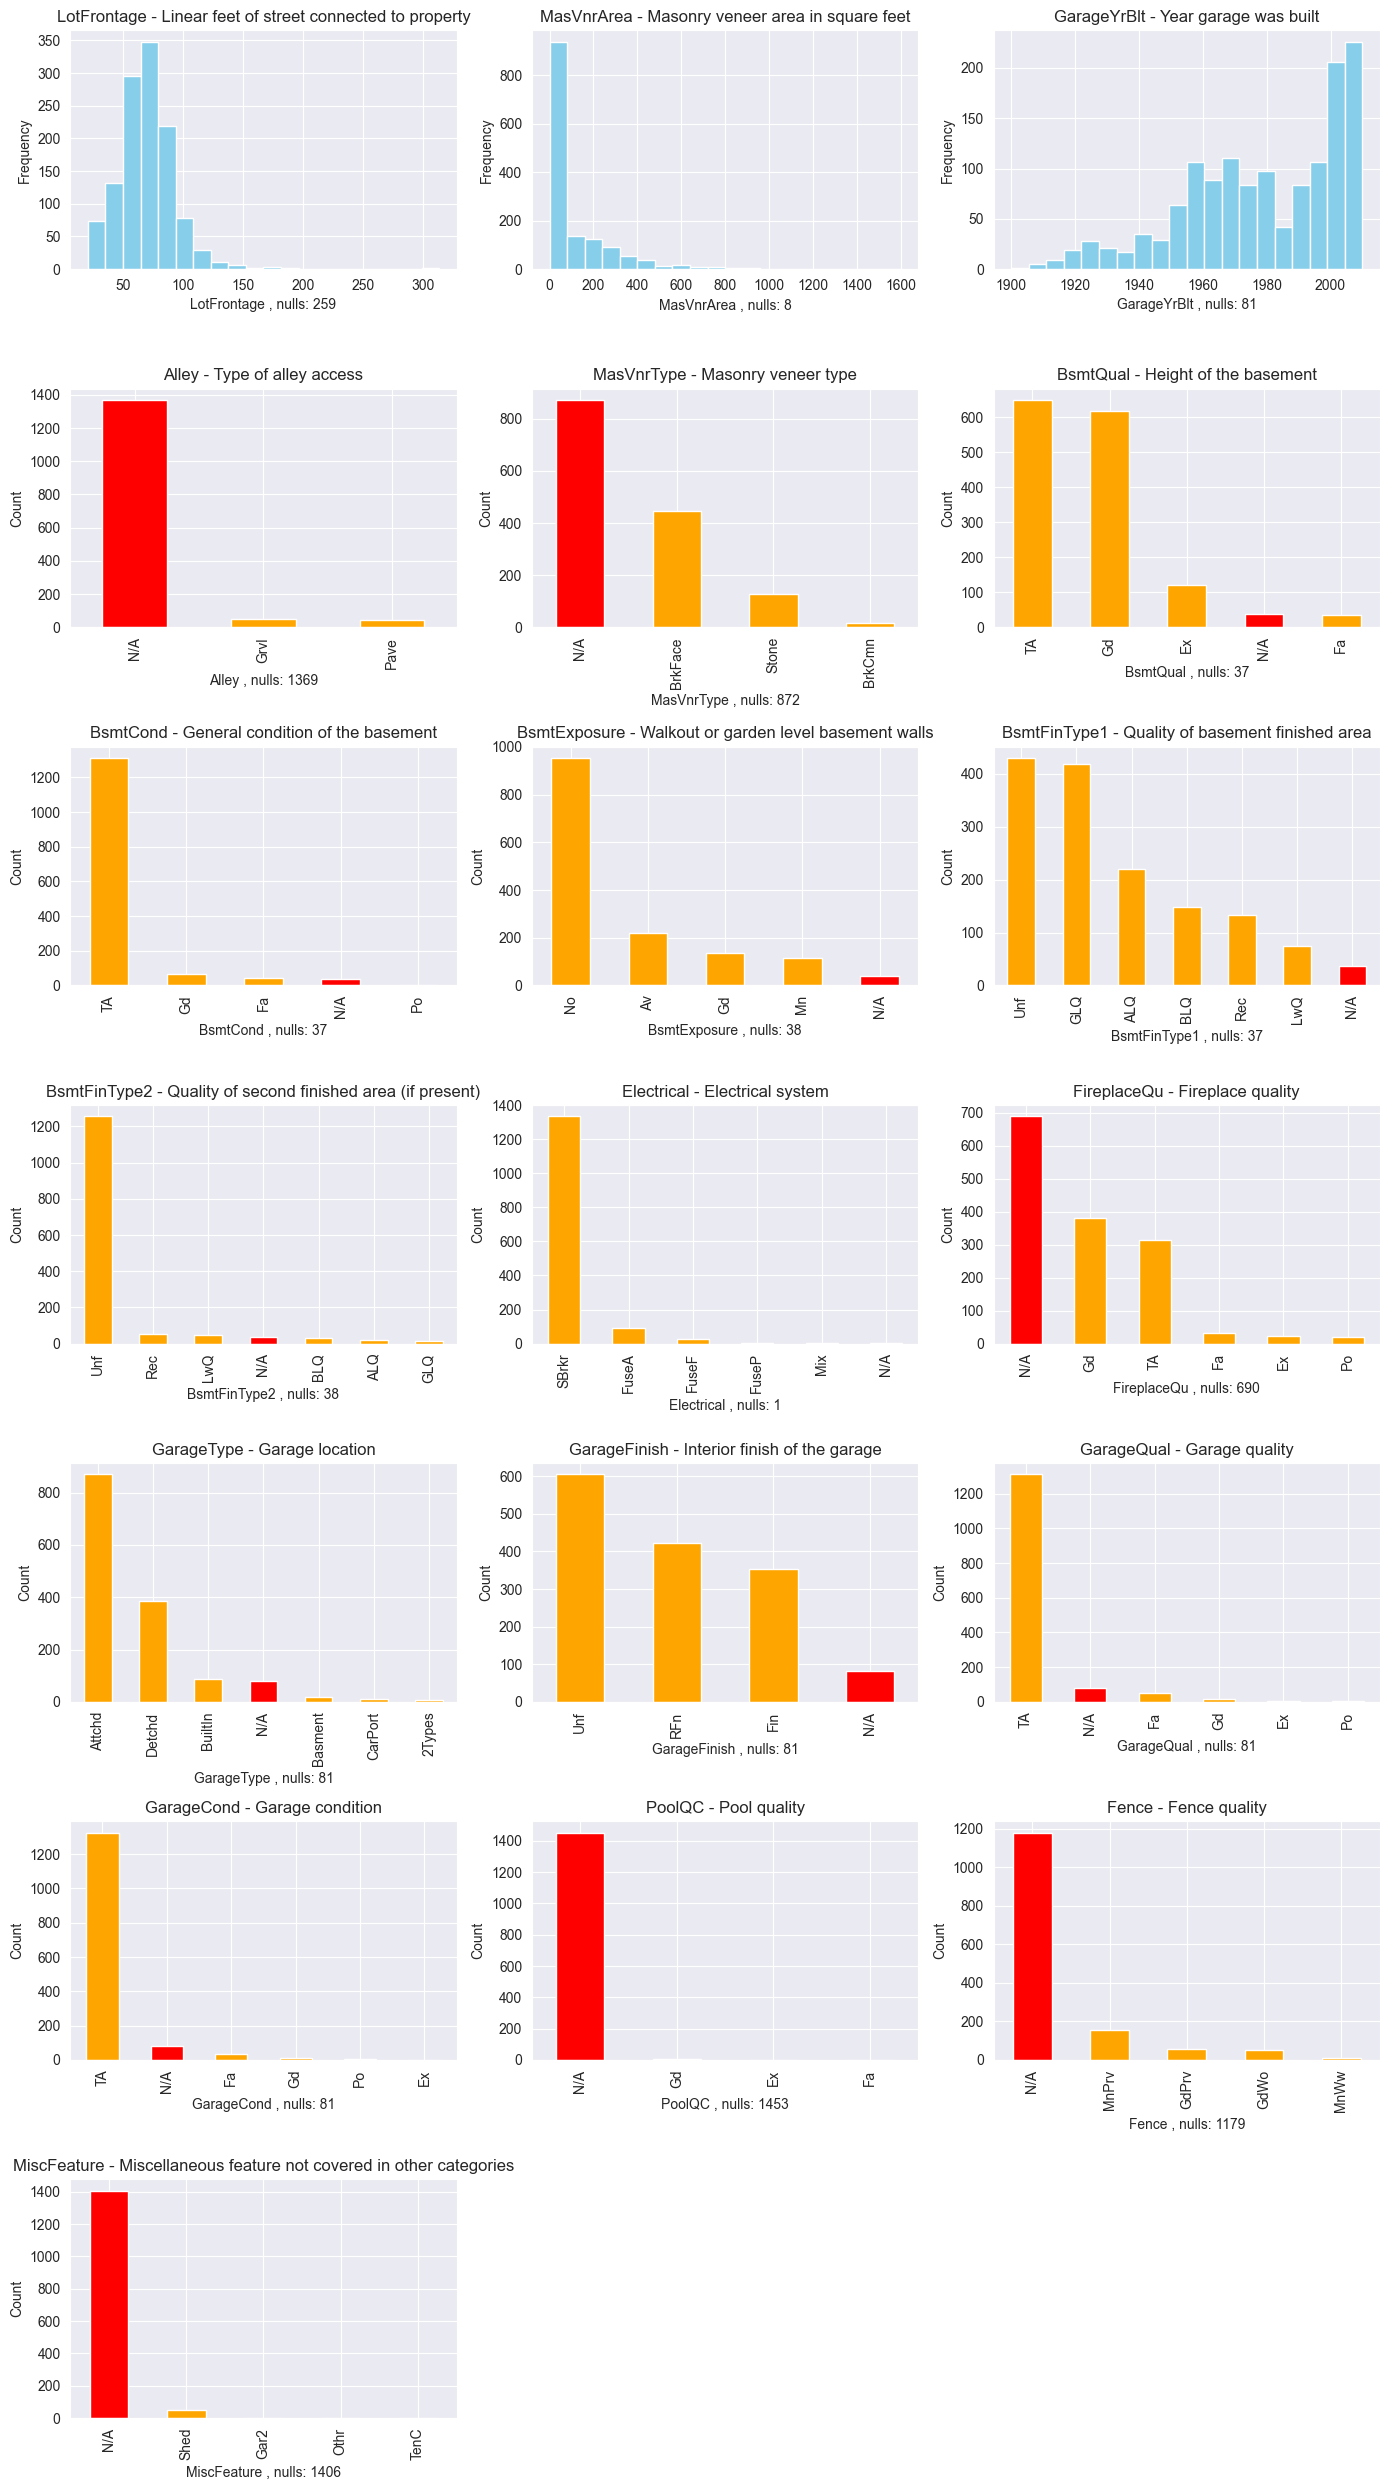

In [10]:
columns_with_nans = df.columns[df.isna().any()]
numeric_cols_with_nans = [col for col in columns_with_nans if df[col].dtype in ['int64', 'float64']]
categorical_cols_with_nans = [col for col in columns_with_nans if col not in numeric_cols_with_nans]

all_columns = numeric_cols_with_nans + categorical_cols_with_nans
num_cols = len(all_columns)

rows = ceil(num_cols / 3)
fig, axes = plt.subplots(rows, 3, figsize=(14, rows * 3 + 4))
axes = axes.flatten()

for i, col in enumerate(all_columns):
    ax = axes[i]
    title = col + " - " + columns_dict.get(col, "")
    x_label = col + " , nulls: " + str(df_nulls[col])
    if col in numeric_cols_with_nans:
        df[col].plot(kind='hist', bins=20, ax=ax, title=title, color='skyblue')
        ax.set_xlabel(x_label)
    elif col in categorical_cols_with_nans:
        value_counts = df[col].fillna("N/A").value_counts()
        colors = ["orange" if index != "N/A" else "red" for index in value_counts.index]
        value_counts.plot(kind='bar', ax=ax, title=title, color=colors)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [12]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [13]:
df['GarageYrBlt'] = df['MasVnrArea'].fillna(-1) # supposed to work better than 0 for linear models 

In [14]:
df[categorical_cols] = df[categorical_cols].fillna('Missing')


Lets plot boxplots for numerical features

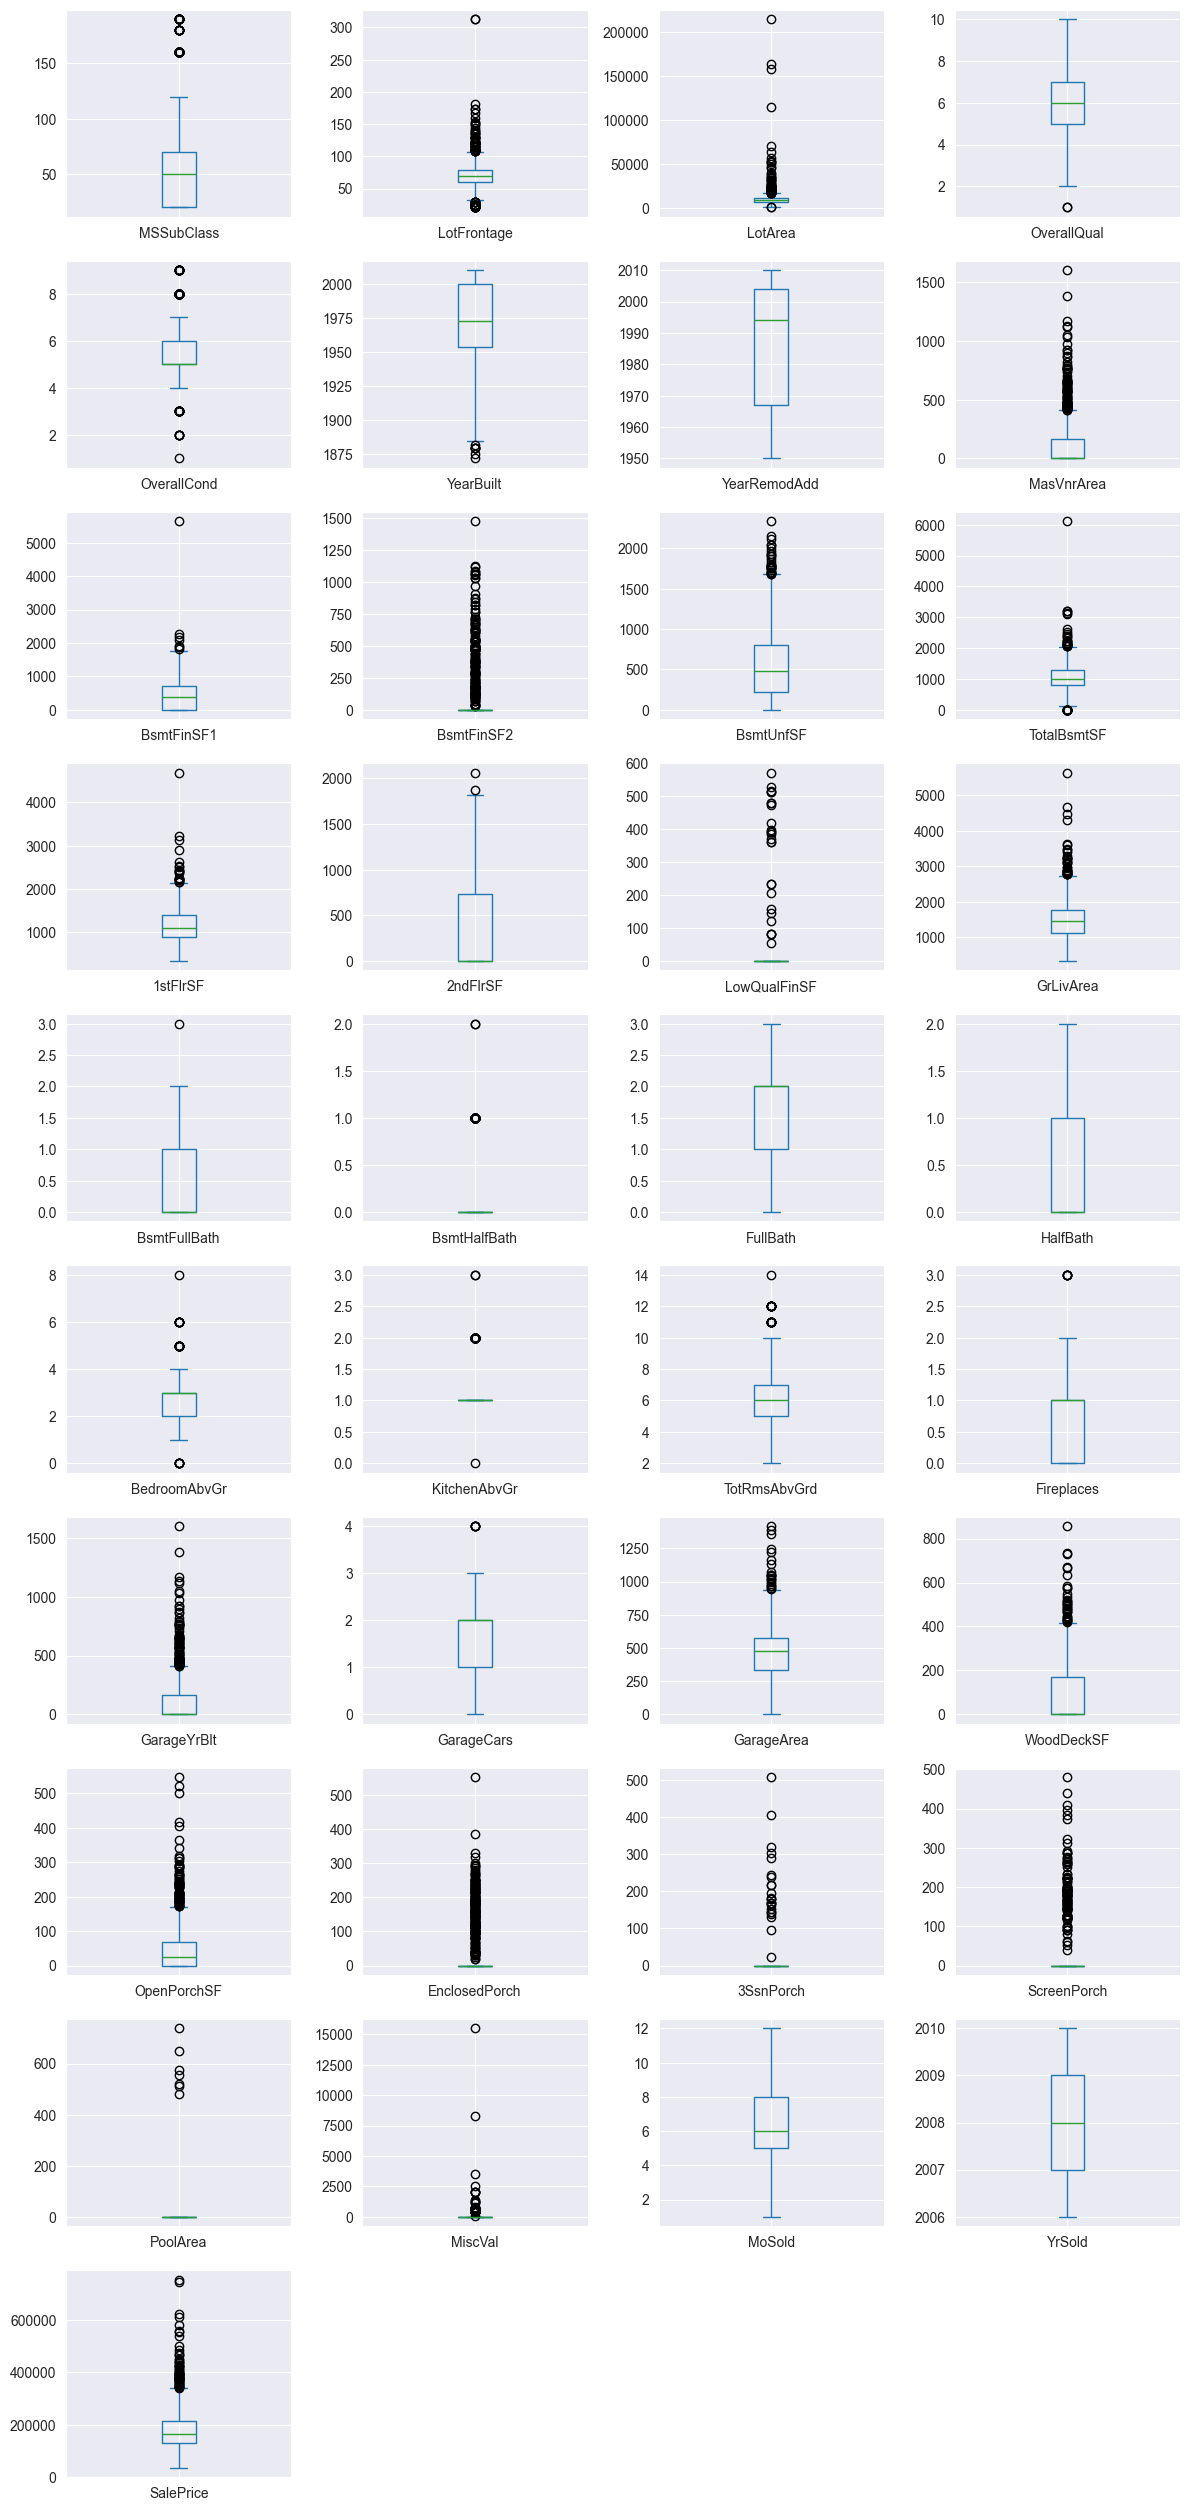

In [15]:
df[numeric_cols].plot(subplots=True, layout=(12,4), kind='box', figsize=(12, 30))
plt.tight_layout()
plt.show()

Let's find correlations with numerical features

In [16]:
correlation_matrix = df[numeric_cols].corr()

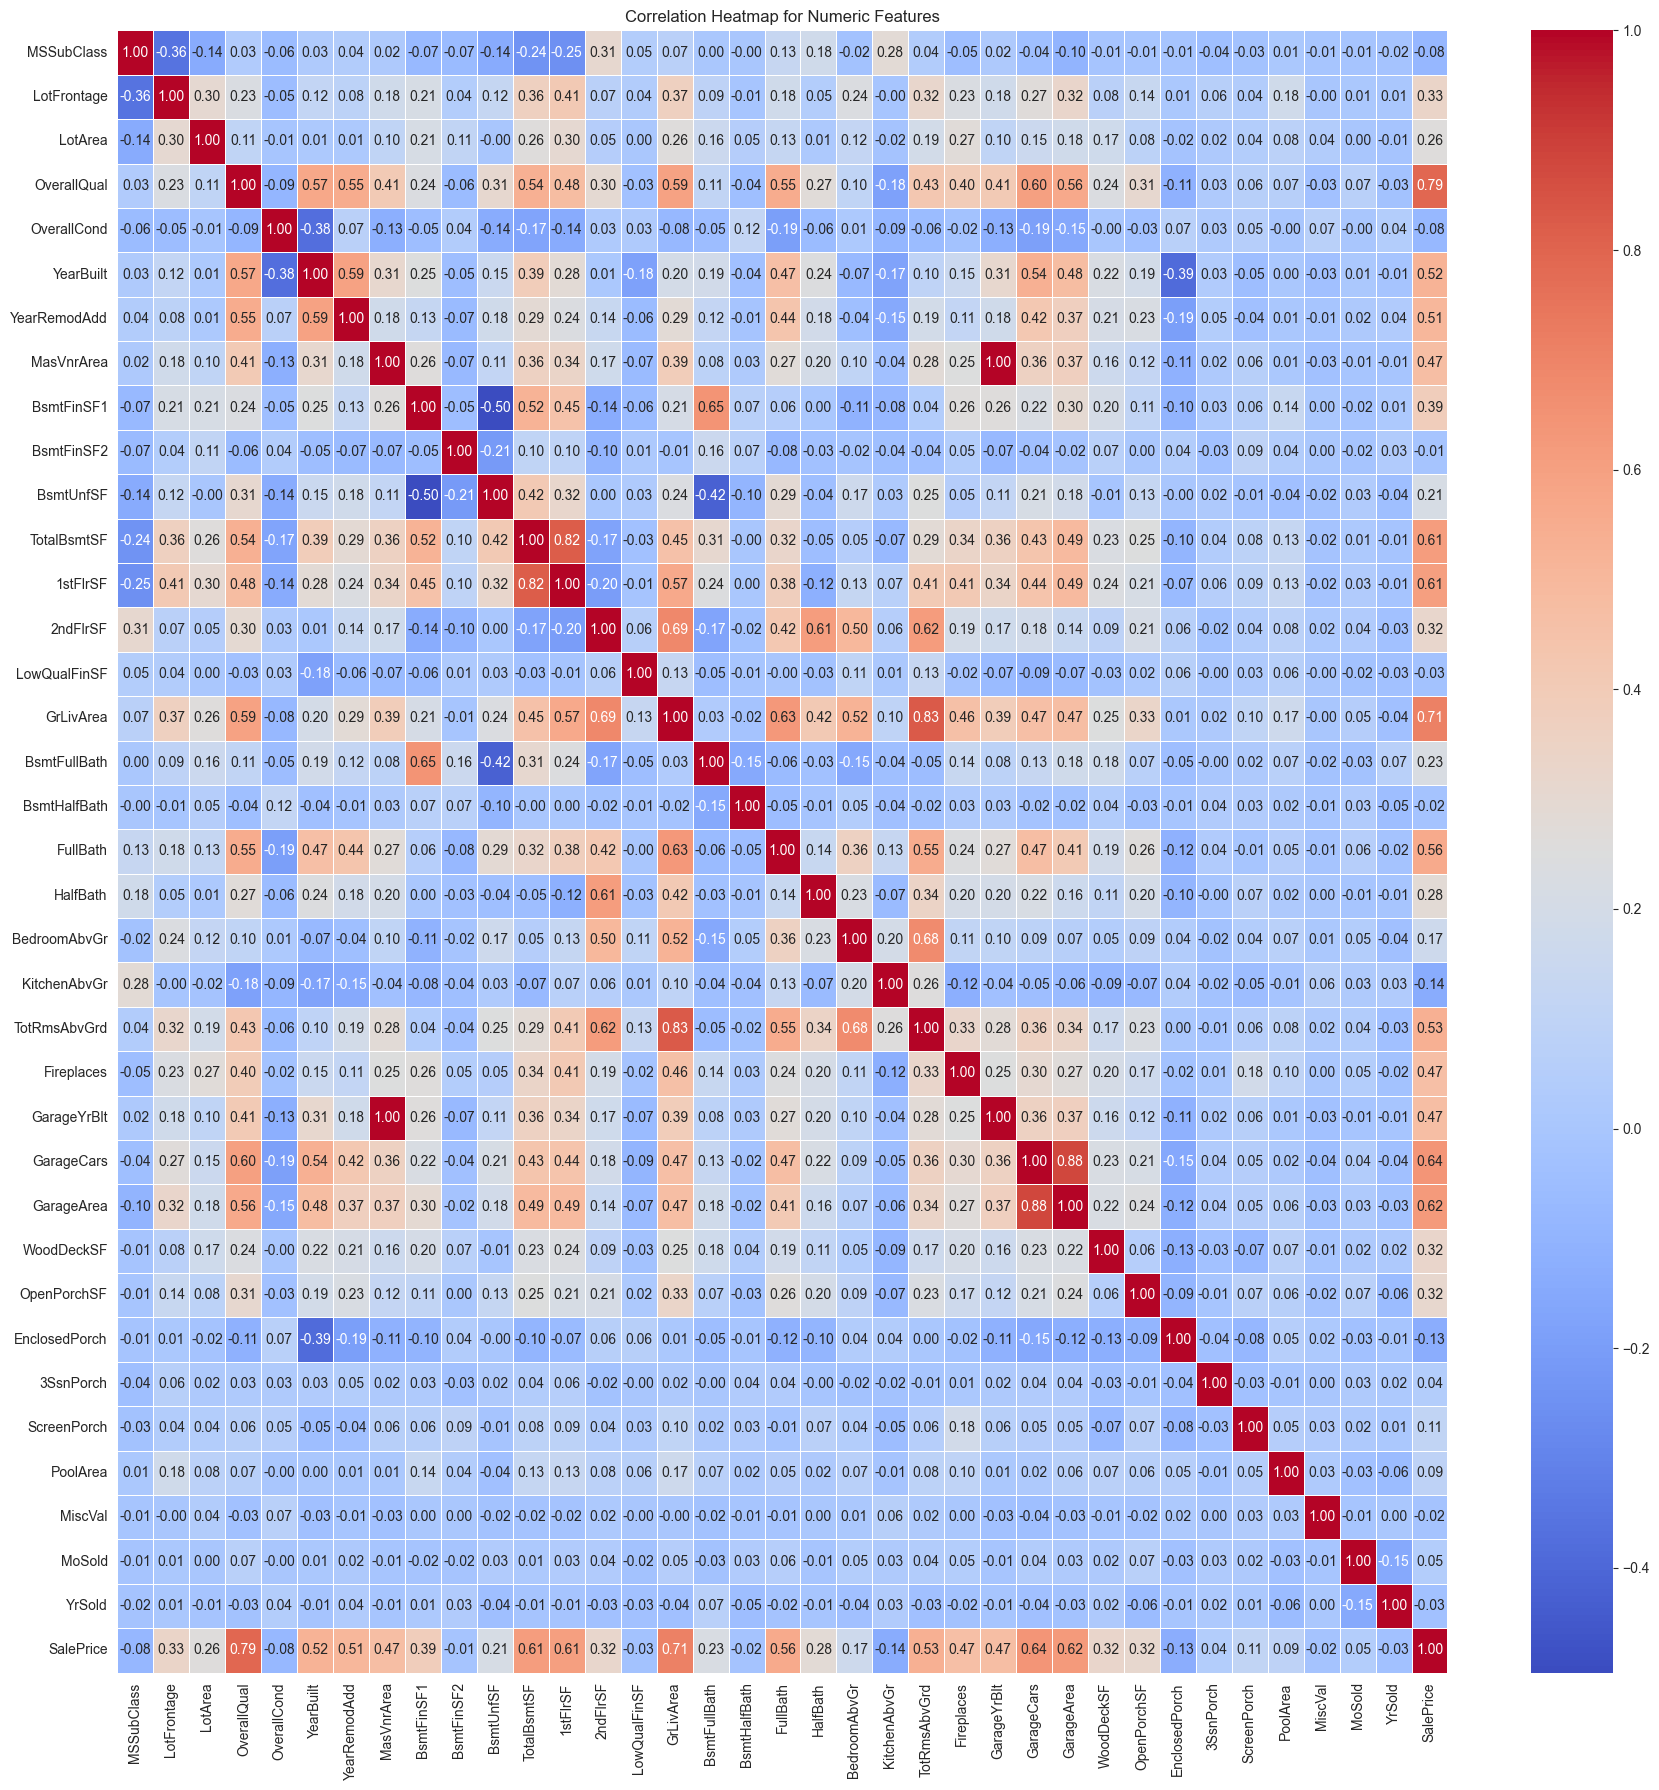

In [17]:
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Features")
plt.tight_layout()
plt.show()

In [18]:
threshold = 0.6

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

highly_correlated_pairs = upper_triangle.stack().reset_index()
highly_correlated_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
highly_correlated_pairs = highly_correlated_pairs[
    abs(highly_correlated_pairs['Correlation']) > threshold
]

In [19]:
highly_correlated_pairs.sort_values(by='Correlation', ascending=False) # high correlations above threshold

,Feature 1,Feature 2,Correlation
247,MasVnrArea,GarageYrBlt,1.000000
600,GarageCars,GarageArea,0.882475
441,GrLivArea,TotRmsAbvGrd,0.825489
341,TotalBsmtSF,1stFlrSF,0.819530
137,OverallQual,SalePrice,0.790982
455,GrLivArea,SalePrice,0.708624
391,2ndFlrSF,GrLivArea,0.687501
531,BedroomAbvGr,TotRmsAbvGrd,0.676620
267,BsmtFinSF1,BsmtFullBath,0.649212
610,GarageCars,SalePrice,0.640409


In [20]:
highly_correlated_pairs.loc[highly_correlated_pairs['Feature 2'] == 'SalePrice', :] # correlation with target 

,Feature 1,Feature 2,Correlation
137,OverallQual,SalePrice,0.790982
365,TotalBsmtSF,SalePrice,0.613581
389,1stFlrSF,SalePrice,0.605852
455,GrLivArea,SalePrice,0.708624
610,GarageCars,SalePrice,0.640409
620,GarageArea,SalePrice,0.623431


Let's find correlations for cat and binary features now

In [21]:
[col for col in df.columns if df[col].nunique() <= 2] # cols with 2 values or less

['Street', 'Utilities', 'CentralAir']

In [27]:
binary_cols = ['Street', 'CentralAir']

In [23]:
df[binary_cols].value_counts()

Street  CentralAir
Pave    Y             1361
        N               93
Grvl    Y                4
        N                2
Name: count, dtype: int64

In [24]:
df['Street'] = df['Street'].map({'Pave': 1, 'Grvl': 0})

In [25]:
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})

In [32]:
# Define Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))


correlations = []

for col in categorical_cols:
    # If binary, use Point-Biserial
    if col in binary_cols:
        correlation, _ = pointbiserialr(df[col], df['SalePrice'])
        correlations.append((col, correlation))
    else:
        # For multi-class, use Cramér's V
        correlation = cramers_v(df[col], df['SalePrice'])
        correlations.append((col, correlation))

In [33]:
correlation_df = pd.DataFrame(correlations, columns=['Feature', 'Correlation'])

highly_correlated = correlation_df[abs(correlation_df['Correlation']) > threshold]  # Adjust threshold
print(highly_correlated)

          Feature  Correlation
0        MSZoning     0.734181
2           Alley     0.649836
3        LotShape     0.747329
4     LandContour     0.687849
6       LotConfig     0.688952
7       LandSlope     0.689661
8    Neighborhood     0.694457
10     Condition2     0.683365
11       BldgType     0.634891
12     HouseStyle     0.670659
13      RoofStyle     0.604286
15    Exterior1st     0.652885
16    Exterior2nd     0.668462
17     MasVnrType     0.723618
18      ExterQual     0.806617
19      ExterCond     0.739405
20     Foundation     0.708963
21       BsmtQual     0.779901
22       BsmtCond     0.761499
23   BsmtExposure     0.743717
24   BsmtFinType1     0.679337
25   BsmtFinType2     0.661062
26        Heating     0.758639
27      HeatingQC     0.642536
29     Electrical     0.667515
30    KitchenQual     0.801226
32    FireplaceQu     0.718055
33     GarageType     0.684796
34   GarageFinish     0.741035
35     GarageQual     0.686947
36     GarageCond     0.620474
37     P

In [34]:
len(categorical_cols)

43